# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the city objects returned by citipy's nearest_city()
cities = []

#empty list for holding tuples containing other city information
#index 0 is lat, index 1 is lng, index 2 is country_code, index 3 is city_name
cities_location_data = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    current_city_name = city.city_name
    
    # If the city is unique, then add it to a our cities list
    if current_city_name not in cities:
        cities.append(current_city_name)
        cities_location_data.append((city.lat, city.lng, city.country_code, city.city_name))


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#purely for testing
test_cities = cities[0:10]
print(test_cities)

Number of cities in the list: 603
['saipan', 'heunghae', 'adamstown', 'port alfred', 'bethel', 'holualoa', 'sonsorol village', 'thompson', 'paphos', 'bamboo flat']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
##########################
# TEST CELL
##########################

# the_weird_lat = 15.325736570808928
# the_weird_long = 120.73129576518153
# print("We expect the result to be Manila or city very close (<30 miles, a little north) to Manila")
# print(f"The actual citipy result gives us: {citipy.nearest_city(the_weird_lat, the_weird_long).city_name}")
# It says Santa Monica, notice that Santa Monica, Philippines is located at (10.12651, 126.04144). Off by about 5 degrees in both latitude and longitude. Citipy does not work as expected here, and I imagine it is due to some flaw in the data set that citipy is based off of.

In [4]:
##########################
# TEST CELL
##########################

# url = "http://api.openweathermap.org/data/2.5/weather?"

# test_city_url = url + f"appid={weather_api_key}&units=metric&q={test_cities[7]}"

# try:
#     test_response = requests.get(test_city_url).json()
# except:
#     "city not found"


In [5]:
##########################
# TEST CELL
##########################


# print(json.dumps(test_response, indent=4))

# try:
#     city_lat = test_response["coord"]["lat"]
#     city_lng = test_response["coord"]["lon"]
#     city_max_temp = test_response["main"]["temp_max"]
#     city_humidity = test_response["main"]["humidity"] 
#     city_clouds = test_response["main"]["humidity"]
#     city_wind = test_response["clouds"]["all"]
#     city_country = test_response["sys"]["country"]
#     city_date = test_response["dt"]

#     #to compare and verify that we do in fact encounter naming collisions when we query using city name to the api, instead of lat/long
#     #The collisions occur because the api defaults to listing the most populous city for a given name. Without providing more information (country code, lat/long) we can't change this behavior. So any city in our cities list that has a name that is the same as another city which is larger, will now essentially be replaced.

#     #I am recognizing this now, and assuming that that is expected for the assignment, even if it slightly skews the cities we choose

#     print(city_lat)
#     print(city_lng)
#     # print(city_max_temp)
#     # print(city_humidity)
#     # print(city_clouds)
#     # print(city_wind)
#     # print(city_country)
#     # print(city_date)
# except:
#     print("city not found, so can't parse its data")


# print(test_cities[7])
# print(lats[7])
# print(lngs[7])


# print(f"Citipy nearest city for lat=lats[7], long=lngs[7] is {citipy.nearest_city(lats[7],lngs[7]).city_name}")

In [6]:
##########################
# TEST CELL
##########################

#model api call in the documentation online 
#https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

# Empty list for holding the latitude and longitude combinations
# test_lat_lngs = []

# # Empty list for holding the cities names
# test_cities = []
# test_cities_location_data = []

# # Range of latitudes and longitudes
# test_lat_range = (-90, 90)
# test_lng_range = (-180, 180)

# # Create a set of random lat and lng combinations
# test_lats = np.random.uniform(test_lat_range[0], test_lat_range[1], size=15)
# test_lngs = np.random.uniform(test_lng_range[0], test_lng_range[1], size=15)
# test_lat_lngs = zip(test_lats, test_lngs)

# # Identify nearest city for each lat, lng combination
# for test_lat_lng in test_lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1])
#     city_name = city.city_name
#     # If the city is unique, then add it to a our cities list
#     if city not in test_cities:
#         test_cities.append(city_name)
#         test_cities_location_data.append((city.lat, city.lng, city.country_code))

# # Print the city count to confirm sufficient count
# print(f"Number of cities in the list: {len(test_cities)}")
# print(f"First city: {test_cities[0]}")
# print(f"First city location data: {test_cities_location_data[0]}")

# alt_url = "https://api.openweathermap.org/data/2.5/weather?"
# alt_query_url = alt_url+f"lat={test_cities_location_data[0][0]}&lon={test_cities_location_data[0][1]}&appid={weather_api_key}"


# print(alt_query_url)



In [7]:
##########################
# TEST CELL
##########################

# try:
#     alt_test_response = requests.get(alt_query_url).json()
# except:
#     "city not found"



In [8]:
##########################
# TEST CELL
##########################


#test cell 5 - we have verification that we can use the above method to iterate through cities while avoiding a naming collision. However, that means changing the starter code. I think I want to do that though. I will include the explanation in the README.

# print(json.dumps(alt_test_response, indent=4))

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

#commenting this out for testing
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    

    #change comments here if we want to change query type
    #city_url = url + f"appid={weather_api_key}&units=metric&q={city}"
    city_url = url+f"lat={cities_location_data[i][0]}&lon={cities_location_data[i][1]}&appid={weather_api_key}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan


Processing Record 2 of Set 1 | heunghae
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | holualoa
Processing Record 7 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | paphos
Processing Record 10 of Set 1 | bamboo flat
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | ponta delgada
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | kill devil hills
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | uturoa
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | crane
Processing Record 23 of Set 1 | atafu village
Processing Record 24 of Set 1 | mo

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.2123,145.7545,298.23,65,75,7.72,MP,1706620174
1,heunghae,36.1095,129.3452,276.43,78,59,1.61,KR,1706620175
2,adamstown,-25.0660,-130.1015,296.55,86,100,8.47,PN,1706620176
3,port alfred,-33.5860,26.8833,296.63,80,100,2.24,ZA,1706620177
4,bethel,60.7922,-161.7558,244.16,83,0,3.60,US,1706620177


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.2123,145.7545,298.23,65,75,7.72,MP,1706620174
1,heunghae,36.1095,129.3452,276.43,78,59,1.61,KR,1706620175
2,adamstown,-25.0660,-130.1015,296.55,86,100,8.47,PN,1706620176
3,port alfred,-33.5860,26.8833,296.63,80,100,2.24,ZA,1706620177
4,bethel,60.7922,-161.7558,244.16,83,0,3.60,US,1706620177


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

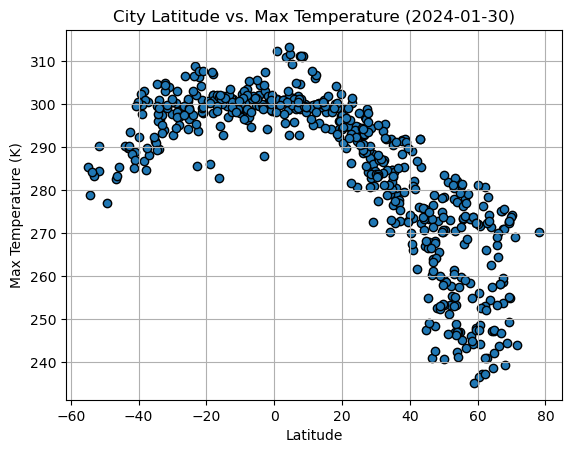

In [20]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_latitudes = city_data_df['Lat']
city_maximum_temperatures = city_data_df['Max Temp']
plt.scatter(city_latitudes, city_maximum_temperatures, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
#I could have subtracted 273.15 to get C, but sticking with Kelvin because it makes my physics brain go brrrrr
plt.ylabel('Max Temperature (K)')
plt.title('City Latitude vs. Max Temperature (2024-01-30)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

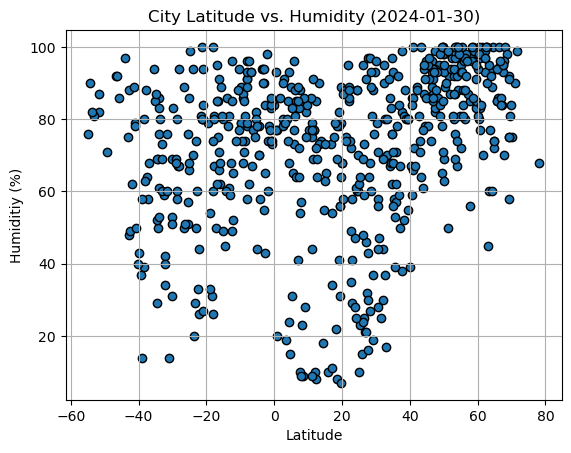

In [21]:
# Build the scatter plots for latitude vs. humidity
city_humidities = city_data_df['Humidity']
plt.scatter(city_latitudes, city_humidities, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
#I could have subtracted 273.15 to get C, but sticking with Kelvin because it makes my physics brain go brrrrr
plt.ylabel('Humiditiy (%)')
plt.title('City Latitude vs. Humidity (2024-01-30)')
plt.grid(True)



# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

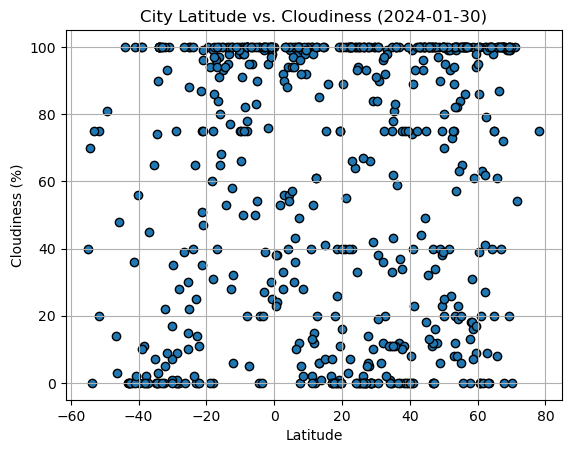

In [22]:
# Build the scatter plots for latitude vs. cloudiness
city_cloudinesses = city_data_df['Cloudiness']
plt.scatter(city_latitudes, city_cloudinesses, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-01-30)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

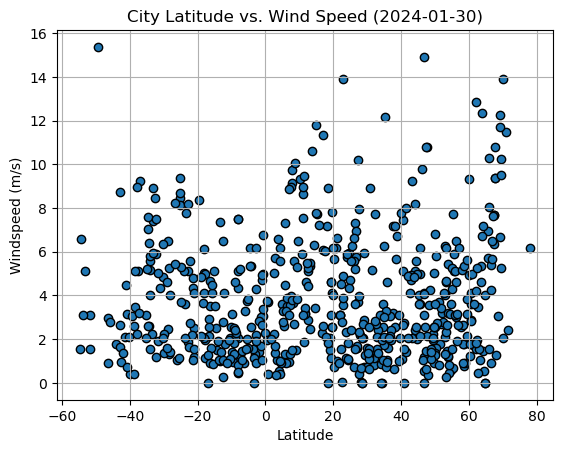

In [23]:
# Build the scatter plots for latitude vs. wind speed
city_wind_speeds = city_data_df['Wind Speed']

plt.scatter(city_latitudes, city_wind_speeds, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Windspeed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-01-30)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
#Shortcoming - axis labels lack units
def perform_plot_linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    #annotation placement in lower left of graph, using coordinates = figure fraction which go from (0,0) in lower left to (1,1) in top right. xy= sets the fraction values. 15% from the left and bottom seemed to work well.

    #alternatively, could make this modular, based on stats of the data (like some percentage of the range of values to the left or right of the median for example)
    plt.annotate(line_eq,xy=(0.15, 0.15), xycoords='figure fraction',fontsize=15,color="red")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.title(f"{x_values.name} vs {y_values.name} 2024-01-30")
    print(f"The correlation coefficient (r-value) is {rvalue}")
    print(f"The r-squared is: {rvalue**2}")
    print(f"Equation of regression: {line_eq}")
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.2123,145.7545,298.23,65,75,7.72,MP,1706620174
1,heunghae,36.1095,129.3452,276.43,78,59,1.61,KR,1706620175
4,bethel,60.7922,-161.7558,244.16,83,0,3.60,US,1706620177
5,holualoa,19.6198,-155.9483,294.57,79,100,4.12,US,1706620178
6,thompson,55.7435,-97.8558,273.33,84,100,5.11,CA,1706620180


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,296.55,86,100,8.47,PN,1706620176
3,port alfred,-33.5860,26.8833,296.63,80,100,2.24,ZA,1706620177
9,tsiombe,-25.3000,45.4833,300.75,57,15,8.16,MG,1706620183
12,port-aux-francais,-49.3492,70.2194,277.07,71,81,15.37,TF,1706620186
16,uturoa,-16.7289,-151.4448,301.43,75,97,2.92,PF,1706620189


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is -0.8433950486041273
The r-squared is: 0.7113152080099582
Equation of regression: y = -0.8x + 308.82


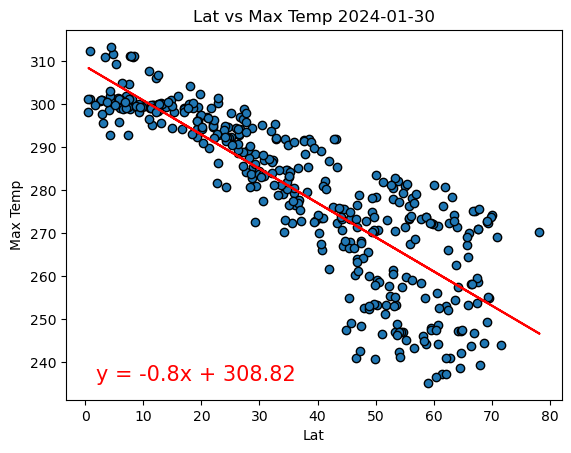

In [56]:
# Linear regression on Northern Hemisphere

perform_plot_linear_regression(x_values=northern_hemi_df['Lat'], y_values=northern_hemi_df['Max Temp'])

The correlation coefficient (r-value) is 0.5590241980316505
The r-squared is: 0.31250805398493
Equation of regression: y = 0.23x + 302.94


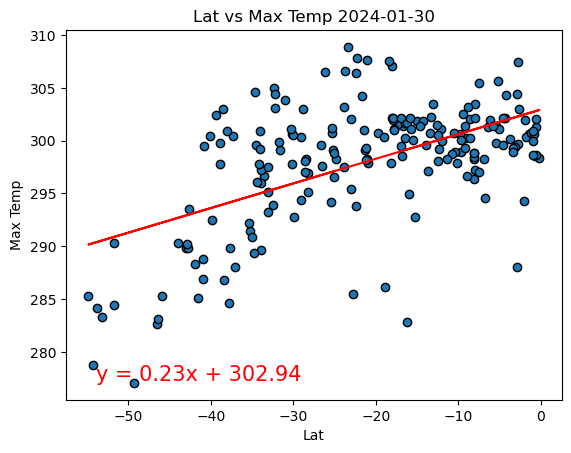

In [57]:
# Linear regression on Southern Hemisphere

perform_plot_linear_regression(x_values=southern_hemi_df['Lat'], y_values=southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** 

I think it's worth noting all the sources of data skewing for human cities. One, it is common knowledge that the bulk of terrain above sea level exists in the northern hemisphere. This explains why we see data points at higher net latitudes - there just isn't much land in the southern parts of the southern hemisphere. Further, the presence of the gulf stream has allowed for more settlements to exist in higher northern latitudes. And as expected in the northern hemisphere, we see a high correlation between increasing latitude and decreasing temperature. As you get closer to the arctic, temperatures decrease. 

We don't see as strong of a correlation in the southern hemisphere, and I suspect it is due to the presence of coastal towns. Because there is more ocean in the sourthern hemisphere, the way we generated cities means that geographical coordinates that point to a place in an ocean eventually find a nearest city. In the southern hemisphere, there will be more of these types of cities, because we expect to find more ocean coordinates. These cities inherently have to be coastal, and these coastal cities have the benefit of being in close proximity to a large body of water - a known factor to provide a stabilizing affect on climate thanks in large part due to the heat capacity of water. Thus I can understand why in the southern hemisphere more than in the northen hemisphere that we see a less steep change in temperatures as we change latitudes. The proximity of water to more cities in this data set is acting as a resistive force to the general trend. Also, the presence of more ocean water in this hemisphere in general probably acts in some respect as a stablizer for climates, but I would want to speak to a meterologist at that point, as that exceeds my cursory knowledge on the subject. 


### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is 0.45023416764623087
The r-squared is: 0.20271080571609432
Equation of regression: y = 0.53x + 54.55


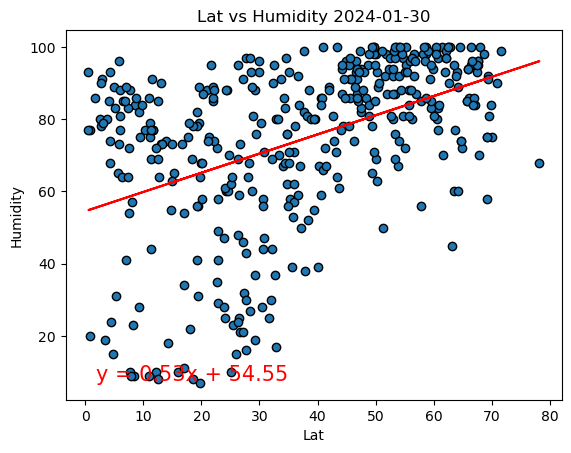

In [58]:
# Northern Hemisphere
perform_plot_linear_regression(x_values=northern_hemi_df['Lat'], y_values=northern_hemi_df['Humidity'])

The correlation coefficient (r-value) is 0.19827090258240762
The r-squared is: 0.039311350810842575
Equation of regression: y = 0.27x + 76.21


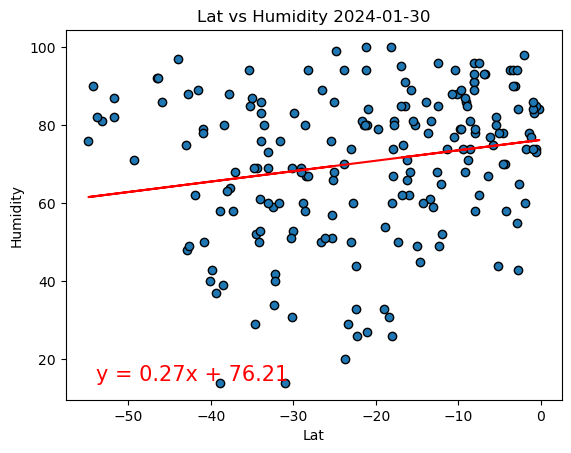

In [59]:
# Southern Hemisphere
perform_plot_linear_regression(x_values=southern_hemi_df['Lat'], y_values=southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** 

Similar to what I had explained in the analysis for hemispheric differences in latitude versus temperature, I still claim that the cities we are using in the southern hemisphere will be more skewed towards coastal cities due to there being more ocean in the southern hemisphere. More coastal cities = more humidity, regardless of latitude. Proximity to water is the largest factor for determining humidity. Because of this skew, I expected a lower correlation in the southern hemisphere than in the northern hemisphere, although I didn't expect much of a correlation to begin with. But humidity can be seen as a measurement of proximity to water (and to a lesser extent, a measurement of the heat available to keep that water as vapor or dissolved in air masses). As we adjust latitudes within hemispheres we don't expect too much of a change in water proximity, we might see a a change in temperature that could explain some more moisture nearer to the equator. 

But there's a lot of factors at play, and in general I didn't expect much of a correlation, and I definitely anticipated that the southern hemisphere would be less correlated if there was one. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is 0.13042884171244495
The r-squared is: 0.017011682750450022
Equation of regression: y = 0.27x + 49.56


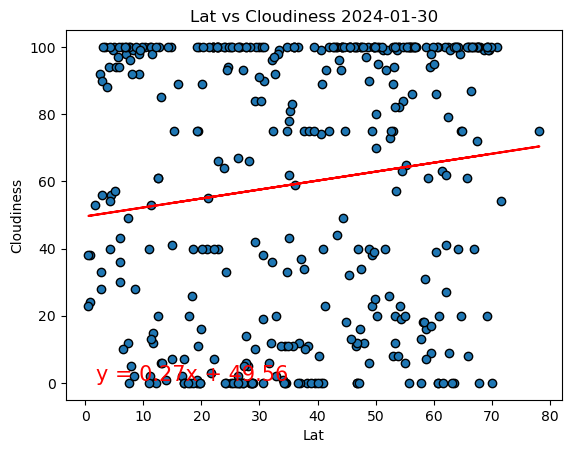

In [60]:
# Northern Hemisphere
perform_plot_linear_regression(x_values=northern_hemi_df['Lat'], y_values=northern_hemi_df['Cloudiness'])

The correlation coefficient (r-value) is 0.4420694044134365
The r-squared is: 0.19542535831845048
Equation of regression: y = 1.29x + 86.44


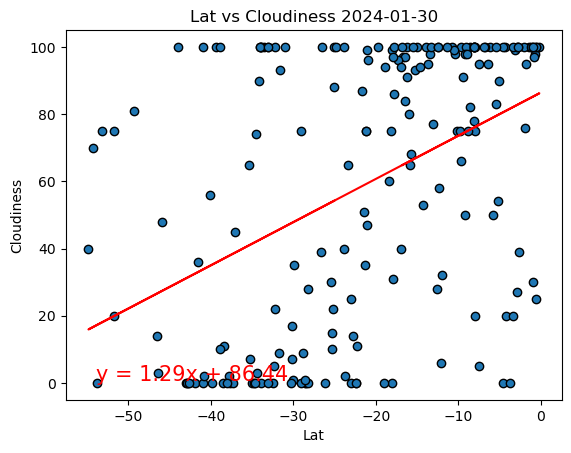

In [61]:
# Southern Hemisphere
perform_plot_linear_regression(x_values=southern_hemi_df['Lat'], y_values=southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** 

These plots I think suffer from the nature of the metric. I almost think that if we split the data points into containers along the lines of container 1 for 0% cloudy, container 2 for 1-99% cloudy, and container 3 for 100% cloudy, then each container would have roughly the same amount of data points. At least that's how these distributions look like to me. 

I think cloudiness also relates to humidity and proximity to water, but also to heat and particular, to fronts forming between air masses. Seasonal differences can explain some of these, and winter/summer differences between the northern/southern hemispheres respectively could explain some of the observed behavior. Precipitates can also help cloud formation. My knowledge on the subject is sketchy though, so I'm not sure what else I can deduce. I anticipated low correlations because of the complexity incolved - there are so many factors and across different latitudes different factors can be observed at any given time.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is 0.05366692437087283
The r-squared is: 0.002880138771428984
Equation of regression: y = 0.01x + 3.63


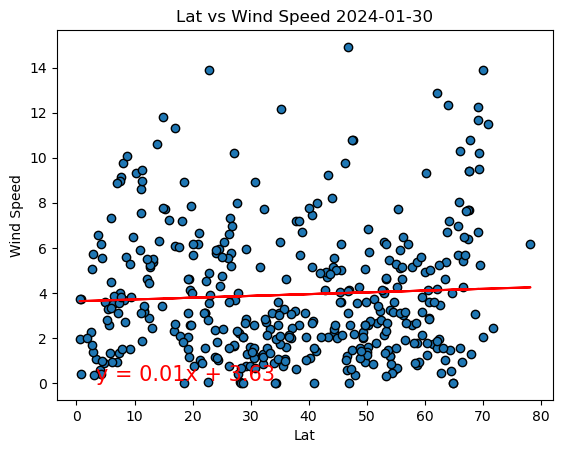

In [62]:
# Northern Hemisphere
perform_plot_linear_regression(x_values=northern_hemi_df['Lat'], y_values=northern_hemi_df['Wind Speed'])

The correlation coefficient (r-value) is -0.2181896354280198
The r-squared is: 0.047606717008212195
Equation of regression: y = -0.04x + 2.68


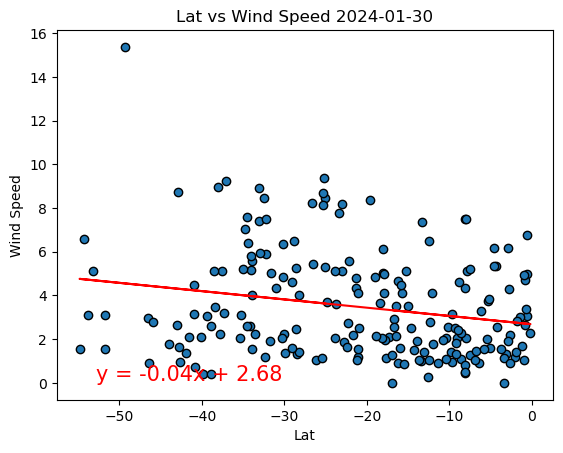

In [63]:
# Southern Hemisphere
perform_plot_linear_regression(x_values=southern_hemi_df['Lat'], y_values=southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** 

It feels like we are descending into more and more complicated dynamics. Fluid flow is one of the most complicated systems humans have ever tried to model. Take a gander at Navier-Stokes and try to tell me that this stuff is predictable. ([here's](https://iopscience.iop.org/article/10.1088/1742-6596/75/1/012053) a quick paper I looked at to make sure that atmospheric sciences really do care about this stuff).

Factors like terrain, heat, water, and surrounding environmental conditions all contribute to wind flows. For a system this complicated, I'd be very surprised to find much correlation at all, and that's what we observe from these plots. 
